In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC

In [3]:
# function to make random classes
# X random with 20 components
# prob(y=1) depends on X[:,0]
# X[:,1] = X[:,0]**2
# X[:,2] = X[:,0]**3
# X[:,3:20] = noise
def make_Class(n):
    X = np.random.uniform(low=0.,high=1.0,size=(n,20))
    # Modify 1 and 2 to functions of 0
    for j in range(1,3):
        X[:,j] = X[:,0]**(j+1)
    # prob(y=1) is sum of the x components (0 and 1)
    p = X[:,0]
    y = 1*(np.random.uniform(low=0.,high=1.,size=n)<p)
    return X,y

#### 1. For this problem you should use the make_Class function given above. First using a sample size of 50, set up a monte-carlo run with test set size of 0.25 times the full sample, and 250 iterations. Draw a new sampel from make_Class at each iteration. Find the difference between the training and test model accuracy. This is known as the in sample bias, or the amount the training set over estimates what you will see on the test set. Do this for a logistic regression with C=1. Also, set max_iter in the LogisticRegression call to 2000. This will make sure the models all get estimated well.

In [4]:
nmc=250
scoreTr = np.zeros(nmc)
scoreTest=np.zeros(nmc)
splbias=np.zeros(nmc)
for i in range(nmc):
    X,y=make_Class(50)
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
    logisticMod = LogisticRegression(C=1.0,max_iter=2000)
    logisticMod.fit(X_train, y_train)
    scoreTr[i] = logisticMod.score(X_train,y_train)
    scoreTest[i]=logisticMod.score(X_test,y_test)
    splbias[i]=scoreTr[i]-scoreTest[i]
print('Logistic In Sample Bias')
print(splbias)
print(np.mean(splbias))

Logistic In Sample Bias
[ 0.43451143  0.25363825  0.04573805  0.1954262  -0.08939709  0.24948025
  0.14553015  0.32224532  0.1954262   0.03742204 -0.03118503  0.14137214
  0.04573805  0.1995842   0.43451143  0.22245322  0.01455301  0.06444906
  0.22661123  0.24532225  0.37214137  0.33056133  0.12266112  0.0997921
  0.40748441  0.07276507  0.04573805 -0.18918919  0.0956341   0.32640333
  0.11850312  0.14137214  0.07276507  0.34927235  0.14553015  0.17255717
  0.14968815  0.1954262  -0.05821206  0.2993763   0.22245322  0.27650728
  0.1995842   0.3035343   0.43035343  0.43451143  0.01871102  0.11850312
 -0.00831601  0.38045738  0.32640333  0.19126819  0.24948025  0.11850312
 -0.05821206  0.06860707  0.27234927  0.01455301  0.06444906  0.43035343
  0.2952183   0.50727651  0.12266112  0.0997921   0.45738046 -0.03950104
  0.24532225  0.09147609  0.22661123  0.22661123  0.27650728  0.14553015
  0.04573805  0.0956341   0.45738046  0.16839917  0.14968815  0.1995842
  0.01455301  0.14553015  0.3

#### 2. Now sweep through a sequence of C’s given by np.power(10,range(-5,10)). Estimate the train and test accuracy again using a monte-carlo simulation with random test/train splits, and 0.25 in the test set. (Again use 250 iterations.) plot this out in semi-log format using plt.semilog() from matplotlib (see docs for more information).

C:\Users\cbccc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


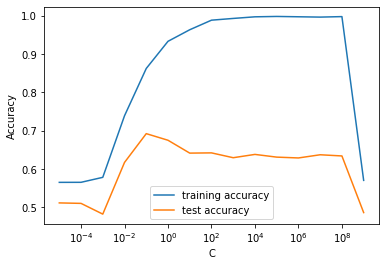

In [5]:
scoreTr = np.zeros([15,nmc])
scoreTest=np.zeros([15,nmc])
C=np.float_power(10,range(-5,10))
for k in range((len(C))) :
    for i in range(nmc):
        X,y=make_Class(50)
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
        logisticMod = LogisticRegression(C=C[k],max_iter=2000)
        logisticMod.fit(X_train, y_train)
        scoreTr[k-1,i] = logisticMod.score(X_train,y_train)
        scoreTest[k-1,i]=logisticMod.score(X_test,y_test)
trainMean=scoreTr.mean(axis=1)
testMean=scoreTest.mean(axis=1)
plt.semilogx(C, trainMean, label="training accuracy")
plt.semilogx(C, testMean, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.legend()

#### 3. Repeat this entire experiment for the linear support vector classifier, but change the range of C to Clist = [25,10,5,1,0.1,0.01,0.001,0.0001], but again plot in semilog form. (You probably should still set max_iter to 2000 in this case too.)

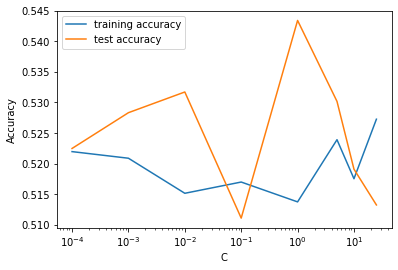

In [6]:
C=np.array([25,10,5,1,0.1,0.01,0.001,0.0001])
scoreTr = np.zeros([len(C),nmc])
scoreTest=np.zeros([len(C),nmc])
for k in range((len(C))) :
    for i in range(nmc):
        X,y=make_Class(50)
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
        LinearSVCMod = LinearSVC(C=C[k],max_iter=15000)
        LinearSVCMod.fit(X_train, y_train)
        scoreTr[k-1,i] = logisticMod.score(X_train,y_train)
        scoreTest[k-1,i]=logisticMod.score(X_test,y_test)
trainMean=scoreTr.mean(axis=1)
testMean=scoreTest.mean(axis=1)
plt.semilogx(C, trainMean, label="training accuracy")
plt.semilogx(C, testMean, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.legend()